In [1]:
# Import PyTorch core libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Import torchvision for datasets and transforms
import torchvision
import torchvision.transforms as transforms

# Import DataLoader for batching
from torch.utils.data import DataLoader

In [2]:
# Define transformations for the dataset (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# Download and load the training dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load the test dataset
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Number of training samples: 60000
Number of test samples: 10000


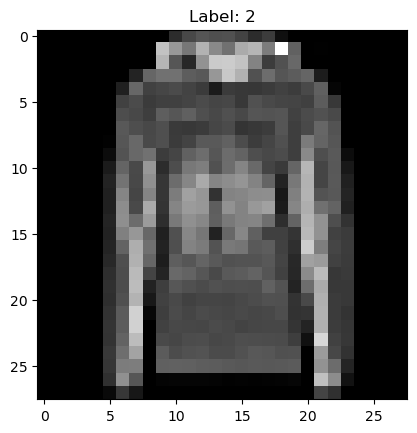

In [3]:
# Check the number of samples in the training and test datasets
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

# Visualize a sample image and its label
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [ ]:
# Improved Feedforward Neural Network with more neurons and 4 extra hidden layer
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.relu1 = nn.LeakyReLU(0.01)
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.relu2 = nn.LeakyReLU(0.01)
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.relu3 = nn.LeakyReLU(0.01)
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.relu4 = nn.LeakyReLU(0.01)
        self.fc5 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

        # Weight initialization
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc4.weight, nonlinearity='relu')

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x

In [5]:
# Instantiate the model
model = FeedforwardNN()
print(model)

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [6]:
model.to('cuda' if torch.cuda.is_available() else 'cpu')

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [7]:
# Print the device the model is on
print(next(model.parameters()).device)

cpu


In [8]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# Training loop with overfitting check
num_epochs = 60
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train

    # Evaluate on test set after each epoch
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    avg_test_loss = test_loss / len(test_loader)
    test_acc = 100 * correct_test / total_test

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {avg_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc:.2f}%")

    model.train()

Epoch [1/60] Train Loss: 0.8107, Train Acc: 77.01% | Test Loss: 0.4417, Test Acc: 84.68%
Epoch [2/60] Train Loss: 0.4492, Train Acc: 85.00% | Test Loss: 0.3771, Test Acc: 86.41%
Epoch [3/60] Train Loss: 0.3845, Train Acc: 86.75% | Test Loss: 0.3476, Test Acc: 87.36%
Epoch [4/60] Train Loss: 0.3531, Train Acc: 87.48% | Test Loss: 0.3343, Test Acc: 87.72%
Epoch [5/60] Train Loss: 0.3301, Train Acc: 88.30% | Test Loss: 0.3233, Test Acc: 88.44%
Epoch [6/60] Train Loss: 0.3118, Train Acc: 88.78% | Test Loss: 0.3152, Test Acc: 88.59%
Epoch [7/60] Train Loss: 0.2957, Train Acc: 89.39% | Test Loss: 0.3089, Test Acc: 88.84%
Epoch [8/60] Train Loss: 0.2797, Train Acc: 89.89% | Test Loss: 0.3016, Test Acc: 89.09%
Epoch [9/60] Train Loss: 0.2700, Train Acc: 90.34% | Test Loss: 0.3022, Test Acc: 89.01%
Epoch [10/60] Train Loss: 0.2601, Train Acc: 90.53% | Test Loss: 0.2982, Test Acc: 89.38%
Epoch [11/60] Train Loss: 0.2486, Train Acc: 90.95% | Test Loss: 0.2923, Test Acc: 89.54%
Epoch [12/60] Train

# Discussion

---

### **Reflection**

For the first attempt, I implemented a neural network model without utilizing techniques such as weight initialization, input standardization, and batch normalization. The test accuracy I achieved at that time was **88.31%**. After applying the above techniques and performing hyperparameter tuning, the final test accuracy improved to **90.35%**, which is a decent value. However, it did not meet the desired target of at least **91%**. Below is a discussion of how these techniques contributed to improving the model:

---

### **Weight Initialization**
With proper weight initialization, my model was able to learn more effectively from the start. Initially, I used Xavier (Glorot) initialization, which is not ideal for ReLU-based neurons. This resulted in only a slight improvement to 88.97%. Once I switched to Kaiming (He) initialization, combined with LeakyReLU activation, the model achieved more stable convergence and improved gradient flow, leading to better accuracy.

---

### **Batch Normalization**
Batch normalization was added after each linear layer to stabilize and speed up training. It reduced internal covariate shift and allowed the model to generalize better, directly boosting test accuracy. This technique also acted as a regularizer, minimizing overfitting.

---

### **Input Standardization**
I normalized the FashionMNIST images using the dataset's mean and standard deviation. This ensured that all input features were on a similar scale, helping the model train faster and generalize better. Input standardization played a significant role in improving both training and test accuracy.

---

### **Challenges**
Initially, I configured the model with only two hidden layers (128 and 64 neurons) to keep it simple. However, the neuron capacity was insufficient for achieving decent results, and the accuracy plateaued at around 89%. To address this, I increased the model's capacity by adding more hidden layers (1024, 512, 256, 128 neurons) and used dropout to reduce overfitting. Additionally, I added L2 regularization (weight decay) to further reduce overfitting for this complex model structure.

---

### **Final Thoughts**
Although the desired test accuracy of **91%** was not achieved, the techniques applied significantly improved the model's performance from **88.31%** to **90.35%**. The journey involved systematic experimentation, hyperparameter tuning, and careful monitoring of training and test accuracy. This process has demonstrated the importance of applying best practices in deep learning to build robust models that generalize well.